In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [49]:
data= pd.read_csv("/content/Airline_Delay_Cause.csv")
data

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,DL,Delta Air Lines Inc.,SEA,"Seattle, WA: Seattle/Tacoma International",480.0,84.0,25.69,3.09,...,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,DL,Delta Air Lines Inc.,SFO,"San Francisco, CA: San Francisco International",505.0,111.0,21.78,2.24,...,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,DL,Delta Air Lines Inc.,SJC,"San Jose, CA: Norman Y. Mineta San Jose Intern...",146.0,36.0,6.99,0.00,...,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,DL,Delta Air Lines Inc.,SJU,"San Juan, PR: Luis Munoz Marin International",95.0,13.0,3.66,0.00,...,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [51]:
data= data.drop(['carrier', 'carrier_name', 'airport', 'airport_name'], axis= 1)
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [52]:
data.dropna(inplace=True)


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317268 entries, 0 to 318016
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 317268 non-null  int64  
 1   month                317268 non-null  int64  
 2   arr_flights          317268 non-null  float64
 3   arr_del15            317268 non-null  float64
 4   carrier_ct           317268 non-null  float64
 5   weather_ct           317268 non-null  float64
 6   nas_ct               317268 non-null  float64
 7   security_ct          317268 non-null  float64
 8   late_aircraft_ct     317268 non-null  float64
 9   arr_cancelled        317268 non-null  float64
 10  arr_diverted         317268 non-null  float64
 11  arr_delay            317268 non-null  float64
 12  carrier_delay        317268 non-null  float64
 13  weather_delay        317268 non-null  float64
 14  nas_delay            317268 non-null  float64
 15  security_delay       3

## **Binary Classification**
---

In [54]:
data['weather_delay'].min(), data['weather_delay'].max()

(0.0, 57707.0)

In [55]:
data['weather_delay_Case']= data['weather_delay'].apply(lambda x:1 if x>100 else 0)
data['weather_delay_Case'].value_counts()

,count
weather_delay_Case,
0,215116
1,102152


In [56]:
X= data.drop(['weather_delay_Case'], axis= 1)
y= data['weather_delay_Case']

In [57]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [58]:
y

,weather_delay_Case
0,0
1,0
2,0
3,0
4,0
...,...
318012,1
318013,1
318014,0
318015,0


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=44, shuffle=True)

print('X_train shape is ', X_train.shape)
print('X_test shape is ', X_test.shape)
print('y_train shape is ', y_train.shape)
print('y_test shape is ', y_test.shape)

X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951,)
y_test shape is  (79317,)


In [60]:
import tensorflow as tf
import keras



In [61]:
KerasModel= keras.models.Sequential([
    #keras.layers.Input(shape=(17)),
    keras.layers.Dense(8, activation='tanh'),
    #keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation= 'sigmoid'),
    #keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation= 'sigmoid')
])

In [62]:
2,4,8,16,32,64,128,256,512 #Dense better values

(2, 4, 8, 16, 32, 64, 128, 256, 512)

In [63]:
MyOptimizer= tf.keras.optimizers.AdamW(
    learning_rate= 0.001,
    weight_decay= 0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    name="AdamW"
)

In [64]:
KerasModel.compile(optimizer= MyOptimizer, loss= 'binary_crossentropy', metrics= ["accuracy"])

In [65]:
history= KerasModel.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs= 100,
                        batch_size= 10000,
                        verbose=1,
                        callbacks= [tf.keras.callbacks.EarlyStopping(
                            patience=10,
                            monitor='val_accuracy', #val_loss
                            restore_best_weights= True
                        )])

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.5663 - loss: 0.7657 - val_accuracy: 0.6773 - val_loss: 0.5839
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6989 - loss: 0.5763 - val_accuracy: 0.7746 - val_loss: 0.4929
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7821 - loss: 0.4787 - val_accuracy: 0.7896 - val_loss: 0.4436
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7972 - loss: 0.4370 - val_accuracy: 0.8099 - val_loss: 0.4009
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8184 - loss: 0.3909 - val_accuracy: 0.8286 - val_loss: 0.3475
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8429 - loss: 0.3306 - val_accuracy: 0.9002 - val_loss: 0.2588
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9054 - loss: 0.2398 - val_accuracy: 0.9305 - val_loss: 0.1949
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9367 - loss: 0.1869 - val_accuracy: 0.9401 -

In [66]:
print(KerasModel.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,997 (136.71 KB)

 Trainable params: 11,665 (45.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,332 (91.14 KB)

None


In [67]:
KerasModel.save('KerasModel.keras')

In [68]:
NewKerasModel= keras.models.load_model('KerasModel.keras')

In [69]:
X_test

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
256596,2007,1,213.0,64.0,16.33,3.44,15.06,0.00,29.17,13.0,0.0,3840.0,912.0,292.0,720.0,0.0,1916.0
6930,2022,1,617.0,82.0,29.69,2.04,26.88,0.30,23.08,27.0,1.0,5410.0,2471.0,157.0,1095.0,15.0,1672.0
125951,2014,11,62.0,8.0,3.00,0.00,2.09,0.00,2.91,0.0,0.0,609.0,391.0,0.0,123.0,0.0,95.0
87817,2017,10,82.0,9.0,6.00,1.20,1.00,0.00,0.80,0.0,0.0,260.0,201.0,22.0,17.0,0.0,20.0
42037,2020,3,168.0,12.0,6.65,2.00,1.04,0.00,2.31,19.0,0.0,558.0,331.0,73.0,43.0,0.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132929,2014,5,2410.0,637.0,222.01,9.35,56.16,0.85,348.62,13.0,0.0,34346.0,9518.0,842.0,2427.0,38.0,21521.0
251541,2007,4,42.0,8.0,5.83,0.00,1.50,0.00,0.67,1.0,0.0,306.0,234.0,0.0,58.0,0.0,14.0
84057,2018,1,80.0,12.0,3.48,3.92,0.12,0.00,4.48,2.0,0.0,1060.0,97.0,721.0,13.0,0.0,229.0
32889,2020,10,356.0,23.0,8.12,0.00,10.33,0.00,4.56,0.0,2.0,989.0,516.0,0.0,260.0,0.0,213.0


In [70]:
y_pred= NewKerasModel.predict(X_test)

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [71]:
print('Prediction shape is {}'.format(y_pred.shape))

Prediction shape is (79317, 1)


In [72]:
print('Prediction items are {}'.format(y_pred[:5]))

Prediction items are [[9.9670535e-01]
 [9.9800545e-01]
 [4.7386988e-04]
 [4.7386988e-04]
 [4.7386988e-04]]


In [73]:
y_test[:5]

,weather_delay_Case
256596,1
6930,1
125951,0
87817,0
42037,0


In [74]:
ModelLoss, modelAccuracy= NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(modelAccuracy))

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9982 - loss: 0.0076
Model Loss is 0.007539162877947092
Model Accuracy is 0.9982979893684387


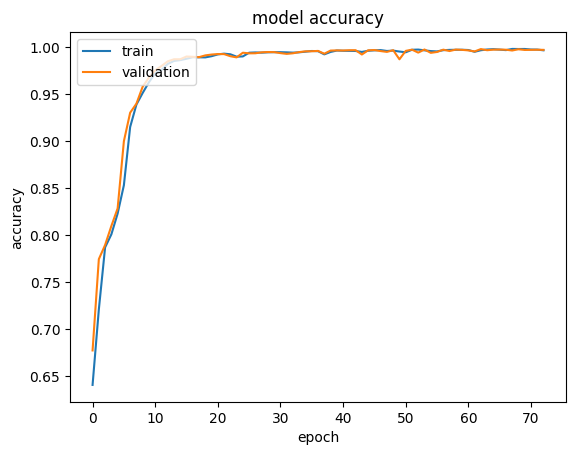

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

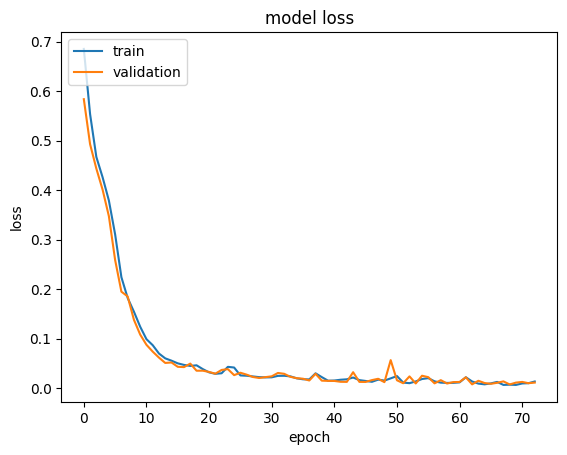

In [76]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [77]:
len(y_test), len(y_pred)

(79317, 79317)

In [78]:
y_pred

array([[9.9670535e-01],
       [9.9800545e-01],
       [4.7386988e-04],
       ...,
       [9.9670535e-01],
       [1.0232711e-03],
       [4.6345503e-03]], dtype=float32)

In [79]:
y_pred= [np.round(i[0]) for i in y_pred]
y_pred

[np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float32(0.0),
 np.float32(1.0),
 np.float32(1.0),
 np.float3

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM= confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[53663    61]
 [   74 25519]]


<Axes: >

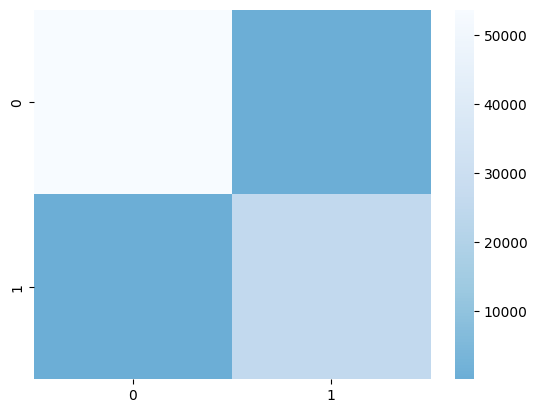

In [81]:
# drawing confusion matrix
sns.heatmap(CM, center= True, cmap='Blues_r')

In [82]:
from sklearn.metrics import classification_report
ClassificationReport= classification_report(y_test, y_pred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53724
           1       1.00      1.00      1.00     25593

    accuracy                           1.00     79317
   macro avg       1.00      1.00      1.00     79317
weighted avg       1.00      1.00      1.00     79317



## **Multi Classification**
---

In [83]:
data['weather_delay'].min(), data['weather_delay'].max()

(0.0, 57707.0)

In [84]:
data.shape

(317268, 18)

In [85]:
def Value(x):
  if x<=30:
    return 0
  elif x<=100:
    return 1
  elif x<=200:
    return 2
  else:
    return 3


data['weather_delay_Case']= data['weather_delay'].apply(lambda x:Value(x))
data['weather_delay_Case'].value_counts()

,count
weather_delay_Case,
0,164988
3,68251
1,50128
2,33901


In [86]:
X= data.drop(['weather_delay_Case'], axis=1)
y=data['weather_delay_Case']

In [87]:
X

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0


In [88]:
y

,weather_delay_Case
0,0
1,0
2,0
3,1
4,0
...,...
318012,2
318013,2
318014,0
318015,0


In [93]:
y_train

,weather_delay_Case
262873,0
256951,0
222136,3
35195,0
287494,0
...,...
50026,2
157301,1
257431,0
200608,0


In [94]:
y_categorical= tf.keras.utils.to_categorical(y)
y[:20]

,weather_delay_Case
0,0
1,0
2,0
3,1
4,0
5,1
6,3
7,0
8,0
9,0


In [95]:
y_categorical[:20]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y_categorical, test_size=0.25, random_state=44, shuffle=True)

print('X_train shape is ', X_train.shape)
print('X_test shape is ', X_test.shape)
print('y_train shape is ', y_train.shape)
print('y_test shape is ', y_test.shape)

X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951, 4)
y_test shape is  (79317, 4)


In [102]:
y_train

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [103]:
KerasModel= keras.models.Sequential([
    #keras.layers.Input(shape=(17, )),
    keras.layers.Dense(8, activation='tanh'),
    keras.layers.Dense(128, activation='tanh'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='softmax')
])

In [104]:
KerasModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
history= KerasModel.fit(X_train, y_train,
                        validation_data= (X_test, y_test),
                        epochs= 500,
                        batch_size= 10000,
                        verbose= 1,
                        callbacks=[
                            tf.keras.callbacks.EarlyStopping(
                                patience=10,
                                monitor='val_accuracy',
                                restore_best_weights=True
                            )
                        ])

Epoch 1/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.5572 - loss: 1.1384 - val_accuracy: 0.6036 - val_loss: 1.0165
Epoch 2/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6066 - loss: 1.0177 - val_accuracy: 0.6091 - val_loss: 1.0021
Epoch 3/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6075 - loss: 1.0109 - val_accuracy: 0.6116 - val_loss: 0.9969
Epoch 4/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6102 - loss: 1.0031 - val_accuracy: 0.6167 - val_loss: 0.9908
Epoch 5/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6174 - loss: 0.9944 - val_accuracy: 0.6194 - val_loss: 0.9859
Epoch 6/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6211 - loss: 0.9881 - val_accuracy: 0.6225 - val_loss: 0.9811
Epoch 7/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6253 - loss: 0.9812 - val_accuracy: 0.6228 - val_loss: 0.9764
Epoch 8/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6257 - loss: 0.9748 - val_accuracy: 0.6242 -

In [106]:
print(KerasModel.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,294 (137.87 KB)

 Trainable params: 11,764 (45.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,530 (91.92 KB)

None


In [107]:
KerasModel.save('KerasModel.keras')

In [108]:
NewKerasModel= keras.models.load_model('KerasModel.keras')

In [110]:
y_pred= NewKerasModel.predict(X_test)
print('prediction shape is {}'.format(y_pred.shape))
print('prediction items are {}'.format(y_pred[:5]))



2479/2479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
prediction shape is (79317, 4)
prediction items are [[4.8232300e-06 4.5821932e-04 9.6170940e-03 9.8991990e-01]
 [5.5980461e-04 6.3182086e-01 3.6340192e-01 4.2173960e-03]
 [9.9932152e-01 6.5528130e-04 1.9453282e-05 3.6827175e-06]
 [9.9932152e-01 6.5528229e-04 1.9453302e-05 3.6827212e-06]
 [5.5980461e-04 6.3182086e-01 3.6340192e-01 4.2173960e-03]]


In [111]:
ModelLoss, ModelAccuracy= NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

print(history.history.keys())

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8917 - loss: 0.2047
Model Loss is 0.2032787948846817
Model Accuracy is 0.8915868997573853
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


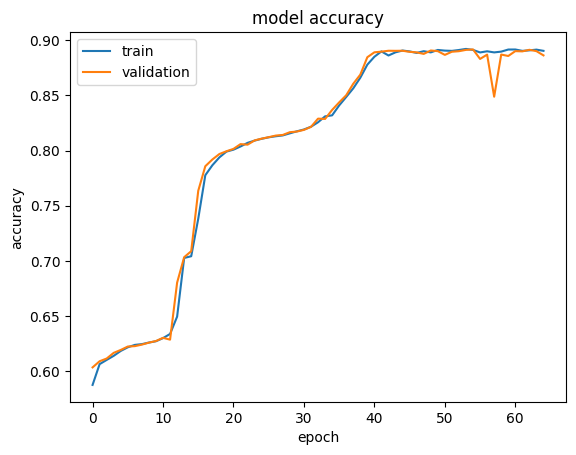

In [112]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

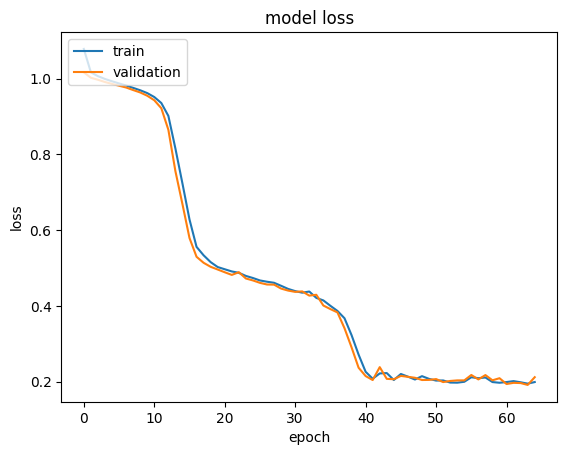

In [113]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [114]:
len(y_test), len(y_pred)

(79317, 79317)

In [115]:
y_pred

array([[4.8232300e-06, 4.5821932e-04, 9.6170940e-03, 9.8991990e-01],
       [5.5980461e-04, 6.3182086e-01, 3.6340192e-01, 4.2173960e-03],
       [9.9932152e-01, 6.5528130e-04, 1.9453282e-05, 3.6827175e-06],
       ...,
       [4.8232300e-06, 4.5821932e-04, 9.6170940e-03, 9.8991990e-01],
       [9.9932152e-01, 6.5528130e-04, 1.9453282e-05, 3.6827175e-06],
       [5.5980461e-04, 6.3182086e-01, 3.6340192e-01, 4.2173960e-03]],
      dtype=float32)

In [116]:
y_test

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [118]:
new_y_pred= [np.argmax(i) for i in y_pred]
new_y_test= [np.argmax(i) for i in y_test]

print(new_y_pred[:10])
print(new_y_test[:10])

[np.int64(3), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(0)]
[np.int64(3), np.int64(2), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(3), np.int64(3), np.int64(0), np.int64(0)]


In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
CM= confusion_matrix(new_y_test, new_y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[41078    27     0     0]
 [   26 12586     0     7]
 [    0  8096    56   435]
 [    0     6     2 16998]]


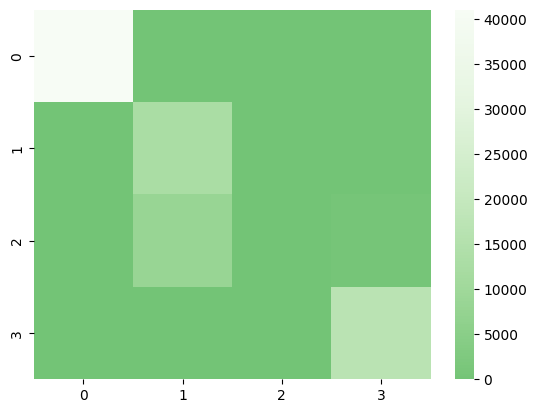

In [123]:
# drawing confusion matrix
sns.heatmap(CM, center= True, cmap='Greens_r')
plt.show()

In [124]:
from sklearn.metrics import classification_report
ClassificationReport= classification_report(new_y_test, new_y_pred)
print('Classification Report is : \n', ClassificationReport)

Classification Report is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     41105
           1       0.61      1.00      0.76     12619
           2       0.97      0.01      0.01      8587
           3       0.97      1.00      0.99     17006

    accuracy                           0.89     79317
   macro avg       0.89      0.75      0.69     79317
weighted avg       0.93      0.89      0.85     79317



## **Regression**
---

In [125]:
data

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,weather_delay_Case
0,2022,5,136.0,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,91.0,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,19.0,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,88.0,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,181.0,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,480.0,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,505.0,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,146.0,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,95.0,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [126]:
X= data.drop(['arr_flights'], axis= 1)
y= data['arr_flights']

In [127]:
X

,year,month,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,weather_delay_Case
0,2022,5,7.0,5.95,0.00,0.05,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0,0
1,2022,5,16.0,7.38,0.00,2.54,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0,0
2,2022,5,2.0,0.13,0.00,1.00,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0,0
3,2022,5,14.0,7.26,0.76,4.35,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0,1
4,2022,5,19.0,13.84,0.00,3.07,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318012,2003,6,84.0,25.69,3.09,33.96,0.0,21.26,0.0,0.0,3744.0,978.0,164.0,1023.0,0.0,1579.0,2
318013,2003,6,111.0,21.78,2.24,73.81,0.0,13.17,3.0,0.0,4284.0,1376.0,138.0,2132.0,0.0,638.0,2
318014,2003,6,36.0,6.99,0.00,26.85,0.0,2.15,0.0,0.0,896.0,205.0,0.0,607.0,0.0,84.0,0
318015,2003,6,13.0,3.66,0.00,7.92,0.0,1.42,0.0,0.0,367.0,120.0,0.0,210.0,0.0,37.0,0


In [128]:
y

,arr_flights
0,136.0
1,91.0
2,19.0
3,88.0
4,181.0
...,...
318012,480.0
318013,505.0
318014,146.0
318015,95.0


In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=44, shuffle=True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (237951, 17)
X_test shape is  (79317, 17)
y_train shape is  (237951,)
y_test shape is  (79317,)


In [130]:
KerasModel = keras.models.Sequential([
        # keras.layers.Input(shape=(17,)),
        keras.layers.Dense(8,  activation = 'tanh'),
        keras.layers.Dense(128, activation = 'tanh'),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(1, activation = 'linear'),
        ])



In [131]:
KerasModel.compile(optimizer ='adam',loss='mse',metrics=['mse'])


In [132]:

history = KerasModel.fit(X_train,
                         y_train,
                         validation_data=(X_test,y_test),
                         epochs=500,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=5,
                                            monitor='val_loss',
                                            restore_best_weights=True)])

Epoch 1/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 1214246.7500 - mse: 1214246.7500 - val_loss: 1222671.6250 - val_mse: 1222671.6250
Epoch 2/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1191631.6250 - mse: 1191631.6250 - val_loss: 1219396.8750 - val_mse: 1219396.8750
Epoch 3/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1195429.6250 - mse: 1195429.6250 - val_loss: 1217743.6250 - val_mse: 1217743.6250
Epoch 4/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1185232.5000 - mse: 1185232.5000 - val_loss: 1216353.2500 - val_mse: 1216353.2500
Epoch 5/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1170084.6250 - mse: 1170084.6250 - val_loss: 1215048.7500 - val_mse: 1215048.7500
Epoch 6/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1164551.1250 - mse: 1164551.1250 - val_loss: 1213791.2500 - val_mse: 1213791.2500
Epoch 7/500
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1182822.2500 - mse: 1182822.2500 - val_loss: 1212566.7500 - val_mse: 1212566.7500
Epoch 8/5

In [133]:
print(KerasModel.summary())


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 8)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,853 (112.71 KB)

 Trainable params: 9,617 (37.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,236 (75.14 KB)

None


In [134]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))
print('Prediction items are {}'.format(y_pred[:5]))


2479/2479 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Prediction Shape is (79317, 1)
Prediction items are [[201.79118]
 [422.7746 ]
 [ 69.35751]
 [ 69.35751]
 [ 69.35751]]


In [135]:
y_test[:5]

,arr_flights
256596,213.0
6930,617.0
125951,62.0
87817,82.0
42037,168.0


In [136]:
ModelLoss, ModelAccuracy= KerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

2479/2479 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 842943.0000 - mse: 842943.0000
Model Loss is 888380.0625
Model Accuracy is 888380.0625


dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


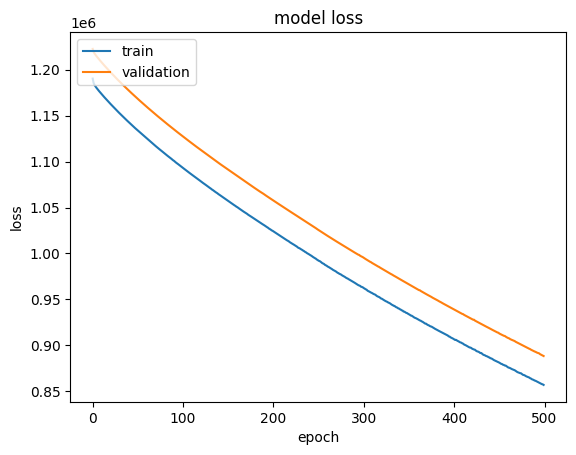

In [137]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

print('Mean Absolute Error Value is : ', mean_absolute_error(y_test, y_pred))
print('Mean Square Error Value is : ', mean_squared_error(y_test, y_pred))
print('Median Absolute Error Value is : ', median_absolute_error(y_test, y_pred))
print('R2 Squared Value is : ', r2_score(y_test, y_pred))

Mean Absolute Error Value is :  231.1297452102227
Mean Square Error Value is :  888379.6119476083
Median Absolute Error Value is :  46.79118347167969
R2 Squared Value is :  0.178381455509804
